**First Step :** Firstly, get yourself familiar with the dataset that you will be using for analysis from which you need to find some useful insights and later use those insights for data modelling. 

This particular **dataset** that we are going to use has been taken from [**Kaggle**](https://www.kaggle.com/aungpyaeap/supermarket-sales) for the sole purpose of analysis. 

**The description of the dataset is given below.**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. 

**Attribute information-**

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage (Gross margin equates to net sales minus the cost of goods sold)

- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)



**Second Step:** Once you are familar with the dataset, start with preprocessing the data, clean the dataset by treating null values and any other inconsistencies if there.

*Mak sure that you are familiar with the Python, as we will be using same to perform analysis, also the steps shown below are being performed in Jupyter notebook.*



In [ ]:
#import required modules
import pandas as pd
import numpy as np
#reading dataset
df = pd.read_csv("/content/supermarket_sales.csv")
#check dataset
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#The info() function is used to print a concise summary of a DataFrame and type of the attributes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
row,col = df.shape
print("Total Rows:",row)
print("Total Columns:",col)


Total Rows: 1000
Total Columns: 17


In [ ]:
#null values
df.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

 *The above findings shows that there are no null values in the dataset, It's great.*

*As you understand the dataset, you can figure out that which columns can provide some good insights and which are of no use. So it's better to remove those unneccsary columns. Hence, here we'll be removing column `Tax 5%` and column `Invoice ID`*

In [ ]:
#removing unneccsary columns
df = df.drop('Tax 5%', axis = 1)
df = df.drop('Invoice ID', axis = 1)


*Did you notice one thing while checking the consice summary of the dataset using `df.indfo()` command. The type of column `Date` was `object` instead it should be a `Date` type. Hence, we need to change the type of the column.*

In [ ]:
#change date and time column to datetime.
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [ ]:
#change date column to datetime as it is taken as object
df['Date'] = pd.to_datetime(df['Date'])
#lets check Dtype of column date
print(df['Date'].dtype)

datetime64[ns]


In [ ]:
#checking values
df['Date'][:10]

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
5   2019-03-25
6   2019-02-25
7   2019-02-24
8   2019-01-10
9   2019-02-20
Name: Date, dtype: datetime64[ns]

*Sometimes, there is requirement to find insights month wise, date wise, hour wise and so on. Hence, it's a good practice to convert datetime .*

In [ ]:
#creating new columns Hour, day, month, year from datetime column.
df['Hour'] = pd.to_datetime(df['datetime']).dt.hour
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

*This is how, you must go with data cleaning, first explore the dataset properly, find discreprencies and inconsistencies in the dataset and then treat them with proper values to get neat and consistent data. Now, let's move on to the next step.* 

**Third Step:** Now, we have a clean dataset which we need to explore more and find out some useful insights and patterns that can be further used in data modelling. Here, we also perform statistical analysis. This step is Exploratory Data Analysis (EDA).
- There are different ways to go with EDA.
- It's better sometimes that you prepare a questionaire and then plan to answer those questions from the dataset available. 
- few examples like :
>- Name different columns in the dataset?
>- What are the categorical columns?
>- What are different customer type?
>- What is the count of customers on the basis of gender?
>- What is the count of customers on the basis of customer type?
>- Average sale per branch?
>- Average profit per branch?

- You can frame such question, starting from simple to even complex and then try to anwers these questions, Once you start answering you'll get some good insights from the data and can move on slowly with the EDA step. Also, It's good if you visualize the dataset or answers these in the form of different graphs. That gives more clarity and provide better understanding.

*Follow below steps to understand more.*

In [ ]:
#get all the column names of the dataset.

for i in df.columns:
  print(i)

Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating
datetime
Hour
day
month
year


In [ ]:
#get only categorical columns
categorical_columns = []
for col in df.columns:
  if df[col].dtype=="object":
    categorical_columns.append(col)

categorical_columns

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Time',
 'Payment']

In [ ]:
#count customer type 
df['Customer type'].value_counts()

# This shows that the customer type column includes to types of customers 1- Member, 2- Normal.

Member    501
Normal    499
Name: Customer type, dtype: int64

In [ ]:
#count Gender
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
# count of Gender basis Customer type - Member
x=df[df['Customer type']=='Member']
x['Gender'].value_counts()

Female    261
Male      240
Name: Gender, dtype: int64

In [ ]:
## count of Gender bais Customer type - Normal
y=df[df['Customer type']=='Normal']
y['Gender'].value_counts()

Male      259
Female    240
Name: Gender, dtype: int64

In [ ]:
#count of city
df["City"].value_counts()


Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
#summary of the dataset - the below function perform statistical analysis on the dataset excluding categorical columns.

df.describe()

,Unit price,Quantity,Total,cogs,gross margin percentage,gross income,Rating,Hour,day,month,year
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,322.966749,307.58738,4.761905e+00,15.379369,6.97270,14.910000,15.256000,1.993000,2019.0
std,26.494628,2.923431,245.885335,234.17651,6.220360e-14,11.708825,1.71858,3.186857,8.693563,0.835254,0.0
min,10.080000,1.000000,10.678500,10.17000,4.761905e+00,0.508500,4.00000,10.000000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,124.422375,118.49750,4.761905e+00,5.924875,5.50000,12.000000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,471.350250,448.90500,4.761905e+00,22.445250,8.50000,18.000000,23.000000,3.000000,2019.0
max,99.960000,10.000000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,20.000000,31.000000,3.000000,2019.0


In [ ]:
# import required libraries for visualizing the dataset.
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
%matplotlib inline

Text(0.5, 1.0, 'Customer type')

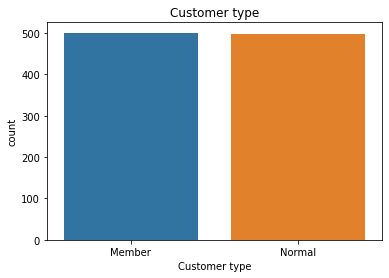

In [ ]:
# count customer type
sns.countplot(x='Customer type', data=df).set_title("Customer type")

Text(0.5, 1.0, 'Customer Type Per Branch')

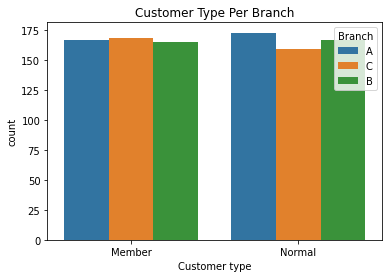

In [ ]:
# count customer type per branch
sns.countplot(x='Customer type', data=df, hue='Branch').set_title("Customer Type Per Branch")


*Now, do you understand the difference in just counting the numbers that we performed earlier and instead ploting it that gives more understanding of the patterns in the dataset. Here, in the above plot, it is clear that there are two types of customer - Member and Normal. Also, there are no such count difference.*

*In similar manner different plots can be ploted as shown below*

Text(0.5, 1.0, 'Gender Per Branch')

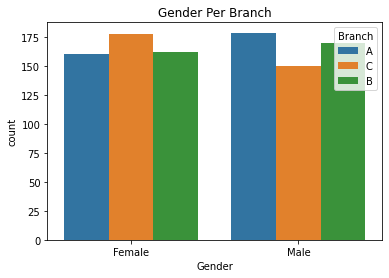

In [ ]:
#Per branch customer distribution on the bais of gender.
sns.countplot(x='Gender', data=df, hue='Branch').set_title("Gender Per Branch")


Text(0.5, 1.0, 'Product Popularity by City')

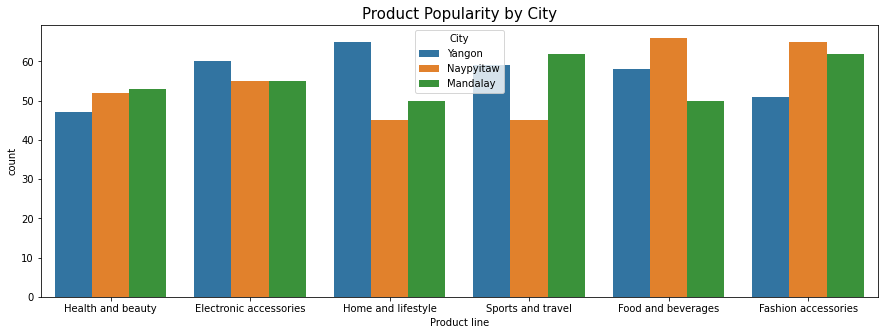

In [ ]:
# Understanding product popularity in the all the cities.
fig=plt.gcf()
fig.set_size_inches(15,5)
sns.countplot(x='Product line', data=df, hue='City')
plt.title('Product Popularity by City',fontsize=15)


*The above plot clearly shows that `Home and lifestyle` products are more 
famous in the city `Yangon`.*

*`Food and beverges` and `Fashion accessories`are more famous in the city `Naypyitaw`.*

*In the city `Mandalay` the `sports and travel` and `Fashion accessories` are sold in high numbers*

*If you want to look at overall sale of products combining all the three branches then refer to the below graph, the graph shows that product `Fashion and accessories` is being sold most.*

Text(0.5, 1.0, 'Total Sale Per Product')

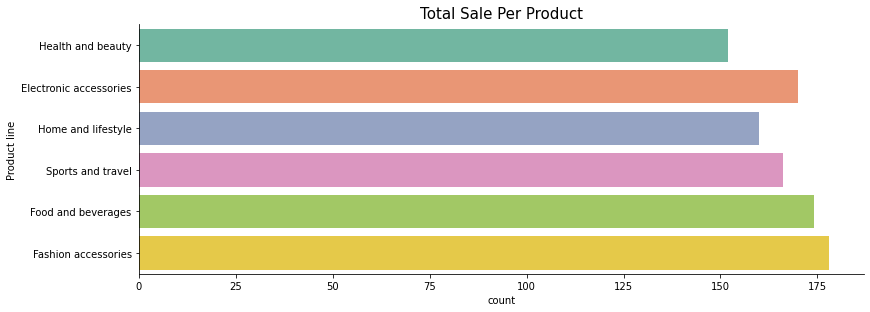

In [ ]:
#Overall which product is sold most?
sns.catplot(y='Product line',kind='count',palette="Set2",data=df,height=4,aspect=3)
plt.title('Total Sale Per Product',fontsize=15)

Text(0.5, 1.0, 'sales per hour over branch basis product ')

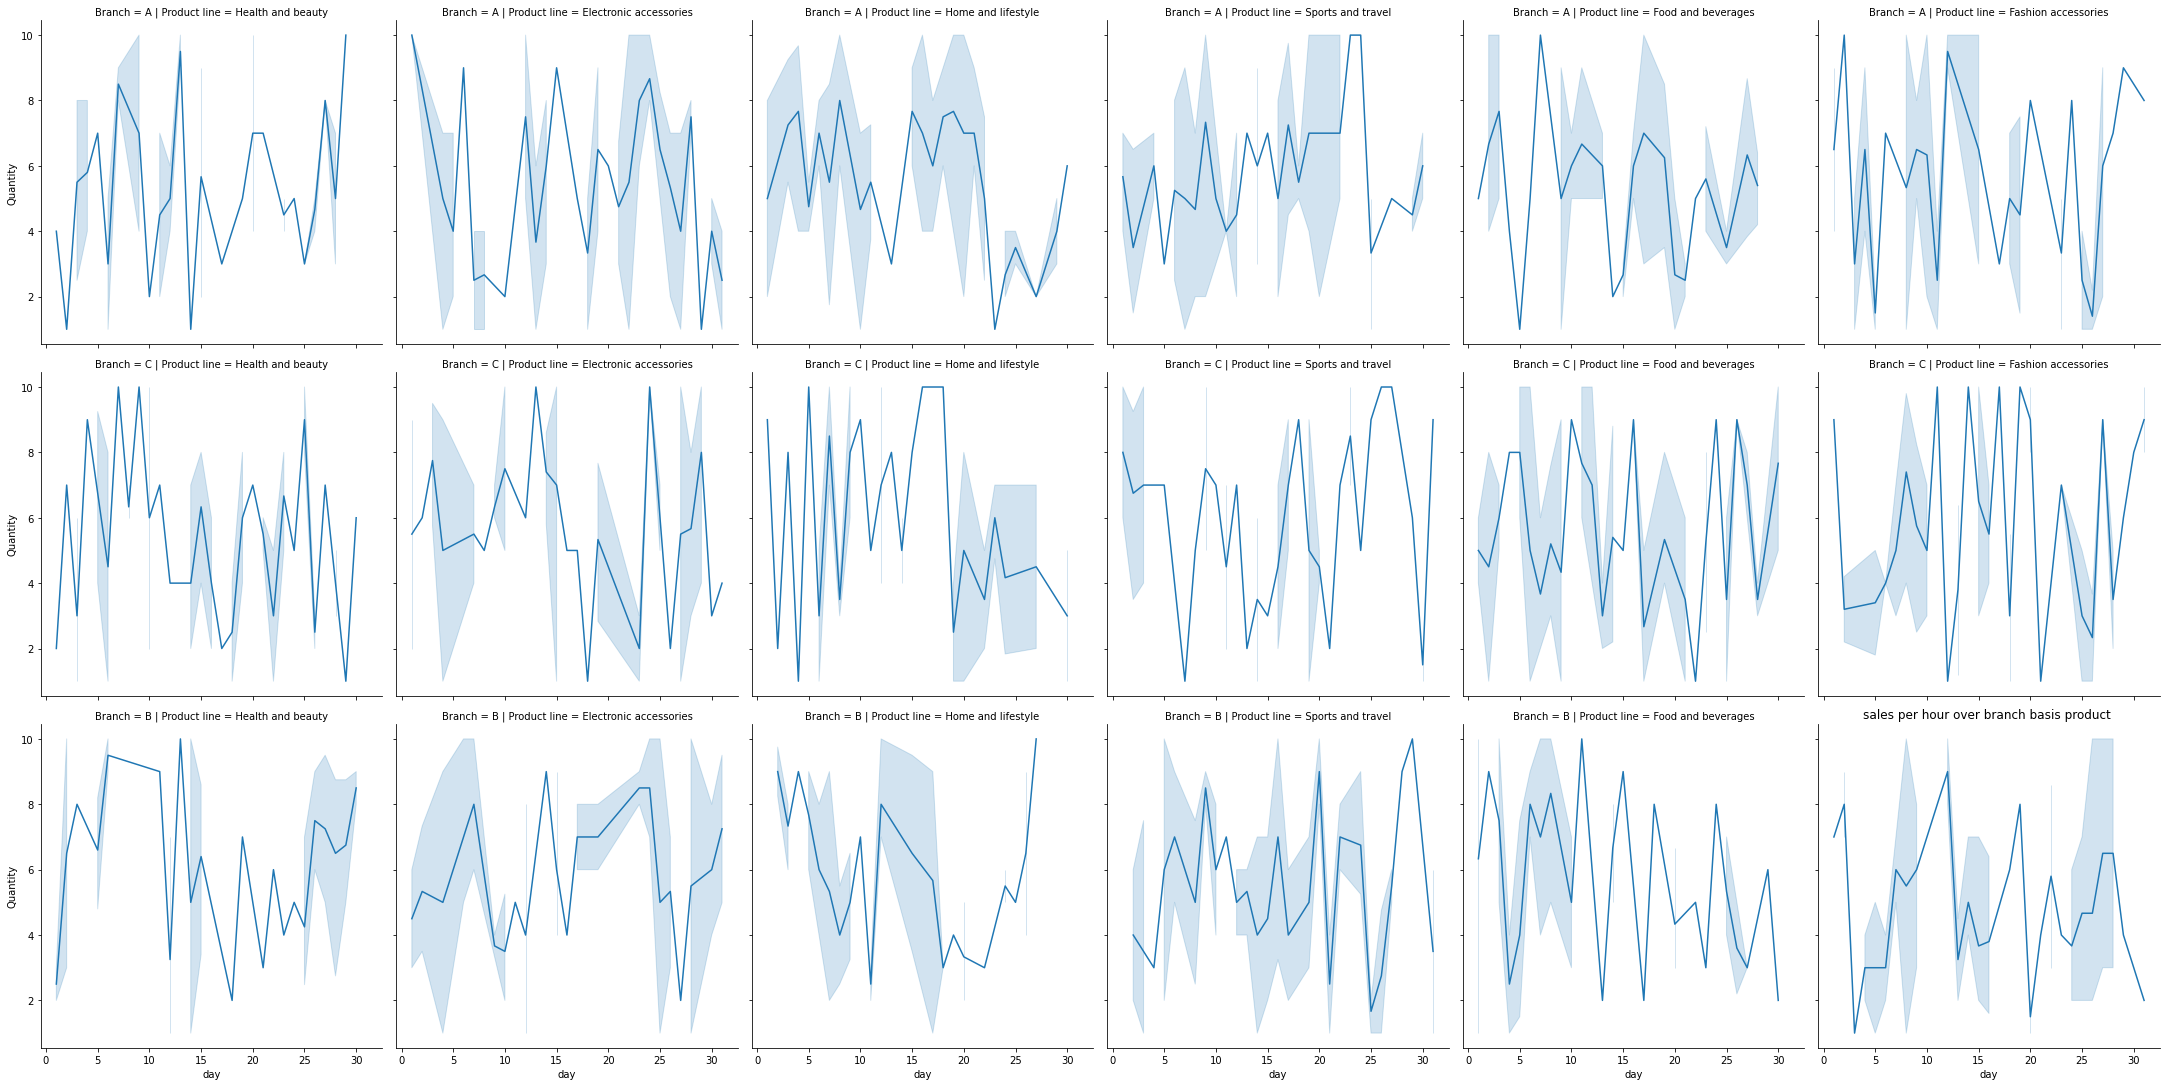

In [ ]:
## comparison of product sale per day over all the three branches.  
sns.relplot(x='day',y='Quantity',kind='line',col='Product line',palette='tab10', data=df, row='Branch')
plt.title("sales per day over branch basis product ")

*The above plot compares between the product sale per day over branches, with this we can clearly identify that which product is in demand during which hour/time of the day. So that the stock can be refilled if the product is not available.*

Text(0.5, 0.98, ' sales per hour basis gender')

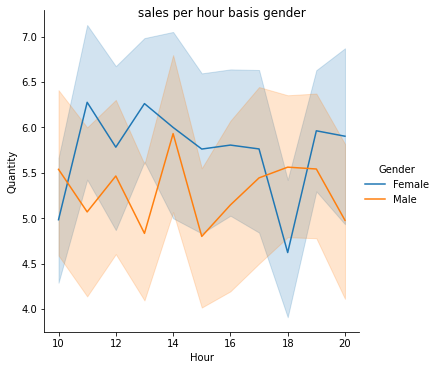

In [ ]:
# Finding sales per hour basis gender
g = sns.relplot(x='Hour',y='Quantity',kind='line',hue='Gender',palette='tab10', data=df, )
g.fig.suptitle(" sales per hour basis gender")

*The above graph shows that there is a spike in male customers shopping during day time around 2, and around 6 in evening there is drop in shopping of the female customers. Female customers are majorly doing shopping during 10-12.*

Text(0.5, 1.0, 'sales per hour basis customer type')

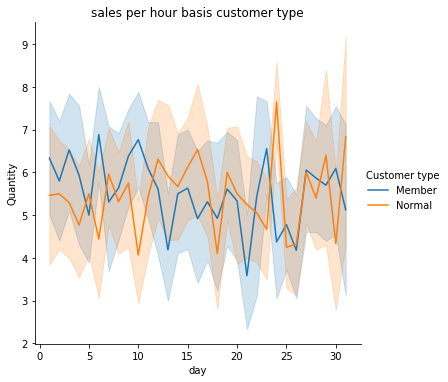

In [ ]:
# Finding sales per hour basis customer type
sns.relplot(x='day',y='Quantity',kind='line',hue='Customer type',palette='tab10', data=df, )
plt.title("sales per hour basis customer type")


*The above graph do a comparison between customer type. As it shows that around 10th day of the month there is a spike in shopping of customer type `member` and on the same day there is drop in shopping of customer type `normal`. This shows that it's possible that during that day some discount might be provided to the member customer that's why sale is high or we cam figure out later what is the reason of the spike and drop on the same day. This is the part of `Diagnostic analytics` that go into deep to generally answer `why` why this happened?*

In [ ]:
# boxplot to understand cotribution by customers basis their gender in the profit generation of the super market.

fig = px.box(df,x='Branch',y='gross income',facet_col="Gender", color="Gender",boxmode="overlay" )
fig.show()

*Here, in the above plot there a comparison being done between branches basis customer gender to understand their contribution to the profit of the super market. The `boxplot` also informs about `outliers` in the data, outliers are the data points which differs in behavior from the other observations. Such as in the above graph, most of the Male custoners in Branch C are contributing upto max value 45 but there are two custmoers that are shown as outliers who are contributing more than 45. Hence, it's a great plot to explore the dataset.*

Text(0.5, 1.0, 'Payment Methods as per Branch')

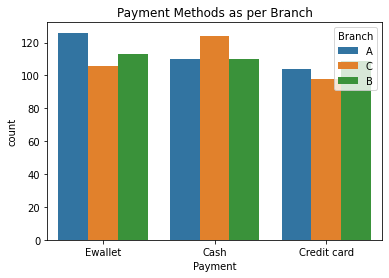

In [ ]:
#payment over Branch
sns.countplot(x='Payment',hue='Branch',palette='tab10', data=df)
plt.title("Payment Methods as per Branch")

*The above graph is showing what kind of different payment methods are being used by customers. Also, you can figure out that in `Branch C` customers are using `cash` method more than other methods and in `Branch A` `Ewallet` is used more.*

Text(0.5, 1.0, 'Gross Income vs Branch')

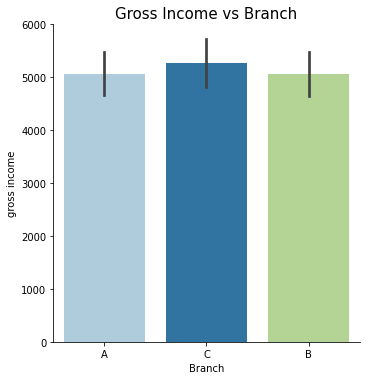

In [ ]:
#find out which branch is generating more Income/profit?
sns.catplot(x='Branch',y='gross income',kind='bar',palette="Paired",data=df,estimator=sum)
plt.title('Gross Income vs Branch',fontsize=15)

*The above graph is showing that though `Branch C` is genrating more profit out of all three but still there is no major difference. Also, you can plot the same findings in a different manner as shown below*

Text(0.5, 1.0, 'Gross Income vs Branch')

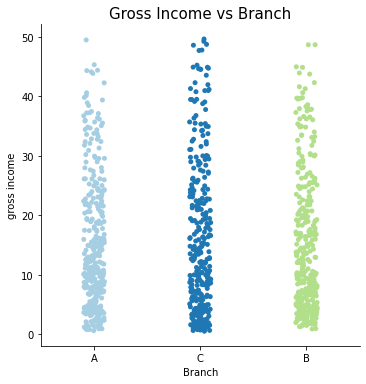

In [ ]:
#Different plotting for above data.
sns.catplot(x='Branch',y='gross income',palette="Paired",data=df)
plt.title('Gross Income vs Branch',fontsize=15)

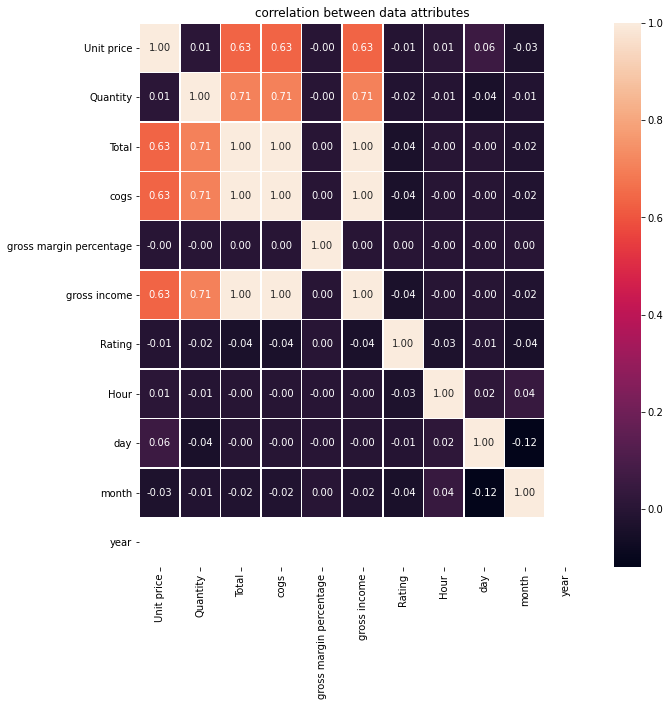

In [ ]:
#correlation between data attributes
df.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.title("correlation between data attributes")
plt.show()


*The above shown graph is a **correlation heatmap** showing **correlation matrix** between attributes of the dataset. This can inform about correlated attributes, affecting each other.*

**The above corrrelation heatmap clearly shows,**
- `Quantity` is showing relation with columns `Total`, `cogs` and `gross income`. This means that `Quantity` is affecting the outcomes of these columns.
- Simillarly, `unit price` is also affecting the same columns.
- Also, `Total` and `cogs` are directly realted to `gross income`.
- Other than this, there are no such relation between the attributes. 

Text(0.5, 1.0, 'sale over time')

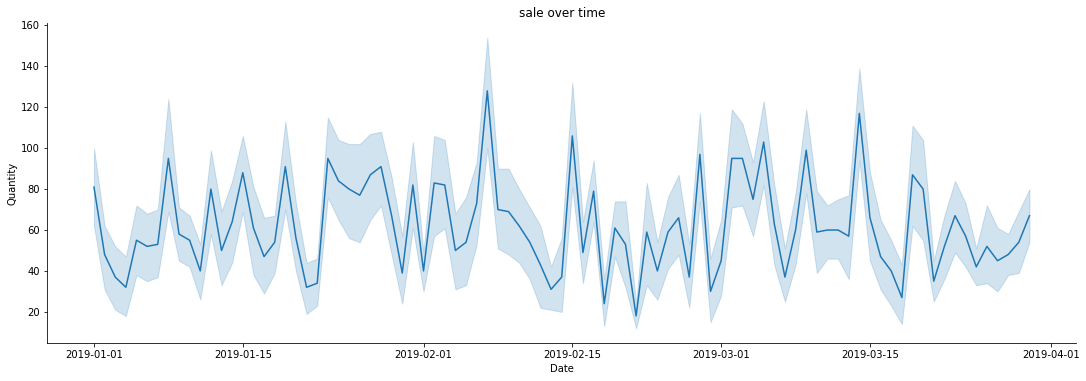

In [ ]:
# line graph depicting sale over time.
sns.relplot(x='Date',y='Quantity',kind='line',data=df,height=5,aspect=3, estimator='sum')
plt.title("sale over time")

Text(0.5, 1.0, 'Profit Generated')

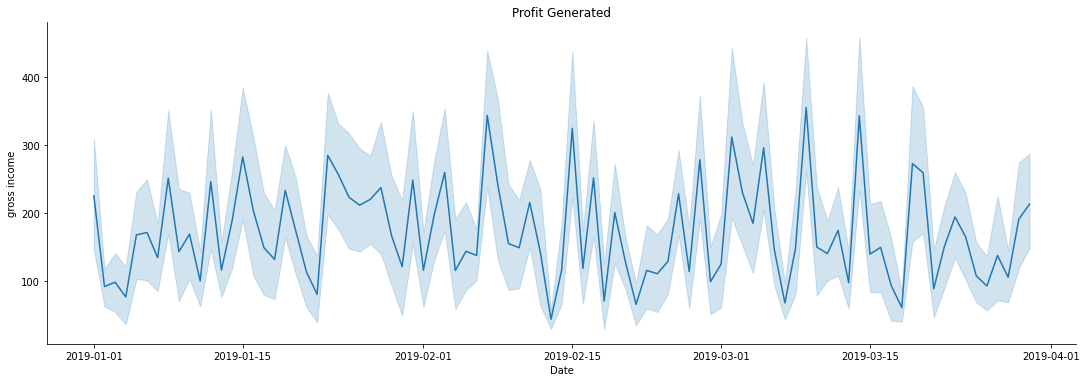

In [ ]:
# line graph depicting gross income/profit over time.
sns.relplot(x='Date',y='gross income',kind='line',data=df,height=5,aspect=3, estimator='sum')
plt.title("Profit Generated")

Text(0.5, 1.0, 'Profit generated by branches')

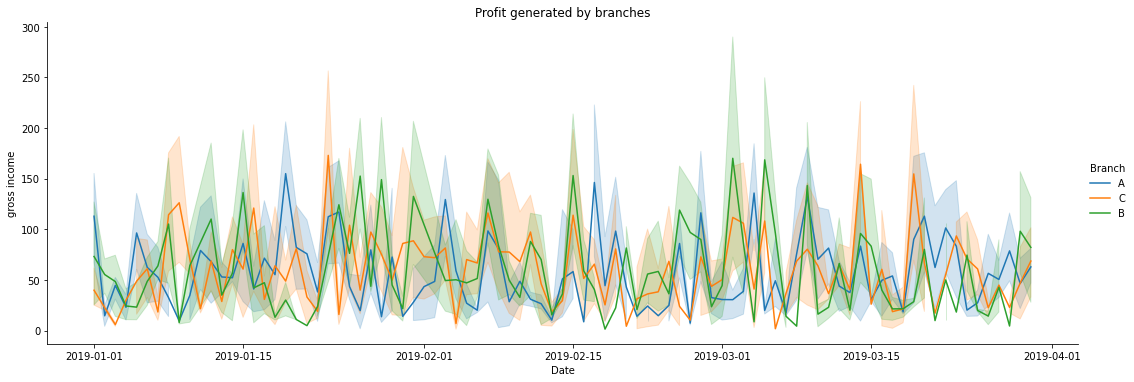

In [ ]:
# line graph depicting per branch gross income over time.
sns.relplot(x='Date',y='gross income',kind='line',hue='Branch',data=df,height=5,aspect=3, estimator='sum')
plt.title("Profit generated by branches")

*There are three different graph being shown that are showing some attribute with respect to date. This is a great way to visualize trends in the data.*

*It is a good practice to check distribution of the data before moving to the modelling step. As if data is skewed than it will not provide proper outcomes and before modelling we are needed to unskew the dataset. Below graph shows how data distribution is performed.*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Quantity Distribution')

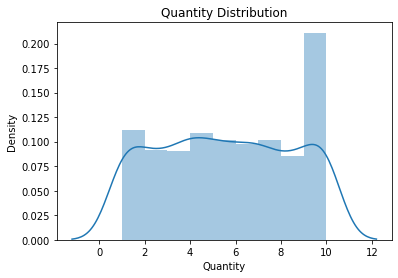

In [ ]:
#Sales Distribution
sns.distplot(df['Quantity'])
plt.title('Quantity Distribution')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



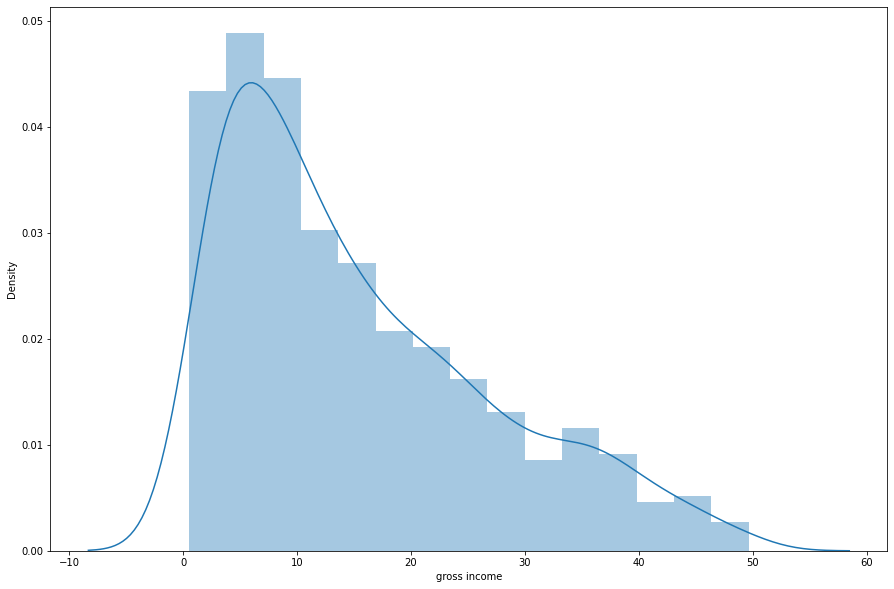

In [ ]:
#distribution of gross income
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['gross income'])

*We can compare attributes with each other in one go as shown in the below plot. It's get easy to visualize and compare attributes and get insights from it.*

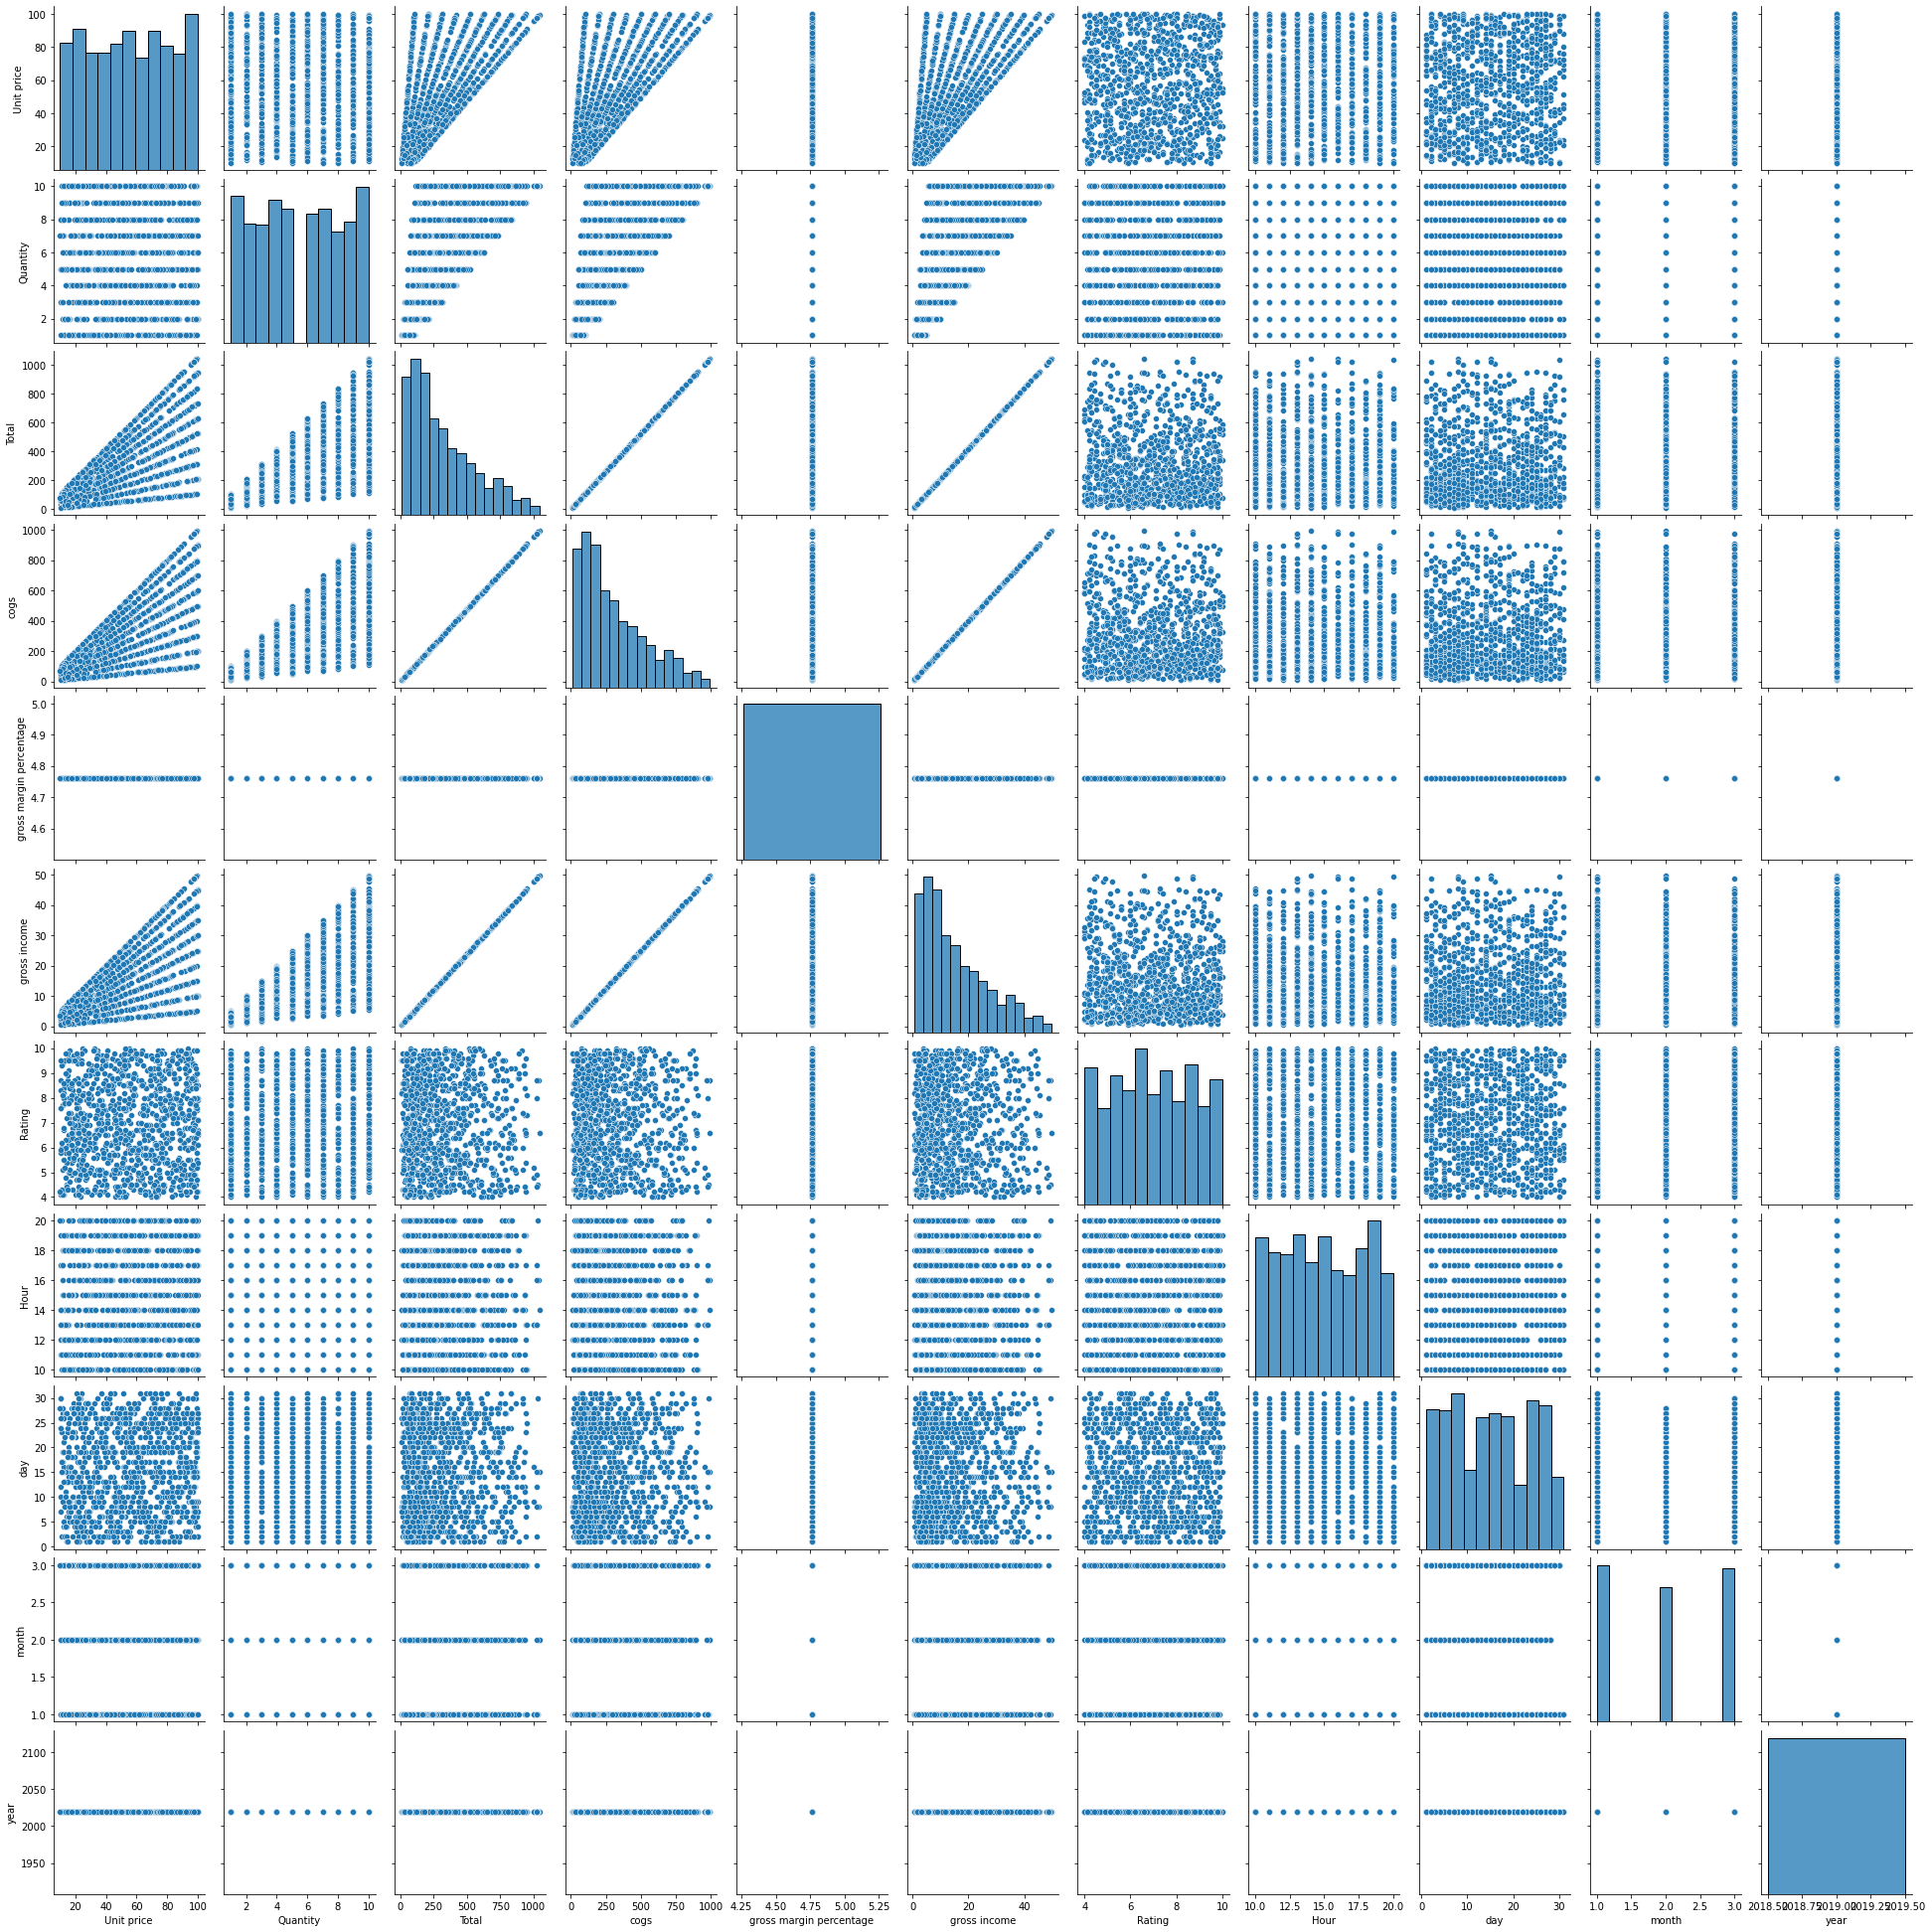

In [ ]:
#pair plots
sns.pairplot(data=df)

*This marks the end of EDA phase.*